In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from sklearn.pipeline import Pipeline
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'preprocessing')))
from transforms import Normalize, ApplyHOG, GaussianBlur
from joblib import Parallel, delayed

In [2]:
with open("../configs/configs.json", "r") as f:
    configs = json.load(f)
    
width = configs["InputImages"]["Width"]
height = configs["InputImages"]["Height"]
kernel = configs["Preprocessing"]["GaussianBlur"]["KernelSize"]
img_path = configs["DataPaths"]["TrainImages"]
visualize = configs["Preprocessing"]["HOG"]["Visualize"]

In [3]:
train_images = pd.read_csv(img_path, header=None)

numpy_images = train_images.values.reshape(-1, width, height).astype(np.float32)

In [4]:
pipeline = Pipeline([
    ('normalize', Normalize()),
    ('gaussian_blur', GaussianBlur(kernel))
])

processed_images = np.array([pipeline.transform(img) for img in numpy_images])

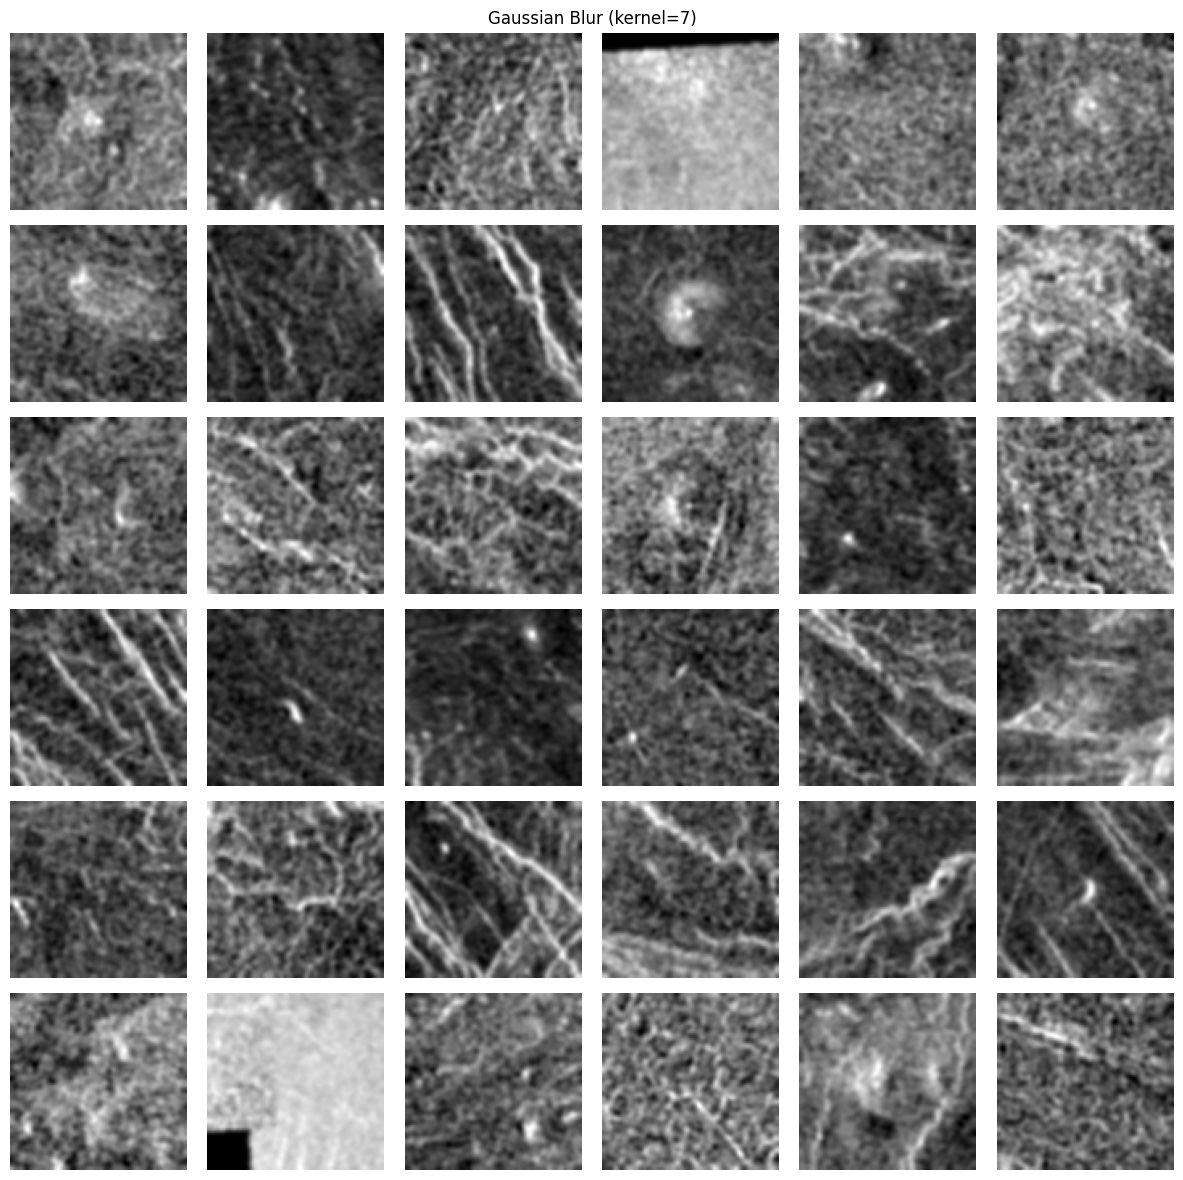

In [5]:
num_images = 36
sample_images = processed_images[:num_images]

fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()  

for i in range(num_images):
    axes[i].imshow(sample_images[i], cmap='gray')
    axes[i].axis('off') 

fig.suptitle(f'Gaussian Blur (kernel={kernel})')
plt.tight_layout()
plt.show()

In [6]:
pipeline = Pipeline([
    ('normalize', Normalize()),
    ('gaussian_blur', GaussianBlur(kernel)),
    ('hog', ApplyHOG(visualize))
])

def process_image(img):
    return pipeline.transform(img)

num_jobs = -1 
hog_images = Parallel(n_jobs=num_jobs)(delayed(process_image)(img) for img in numpy_images)

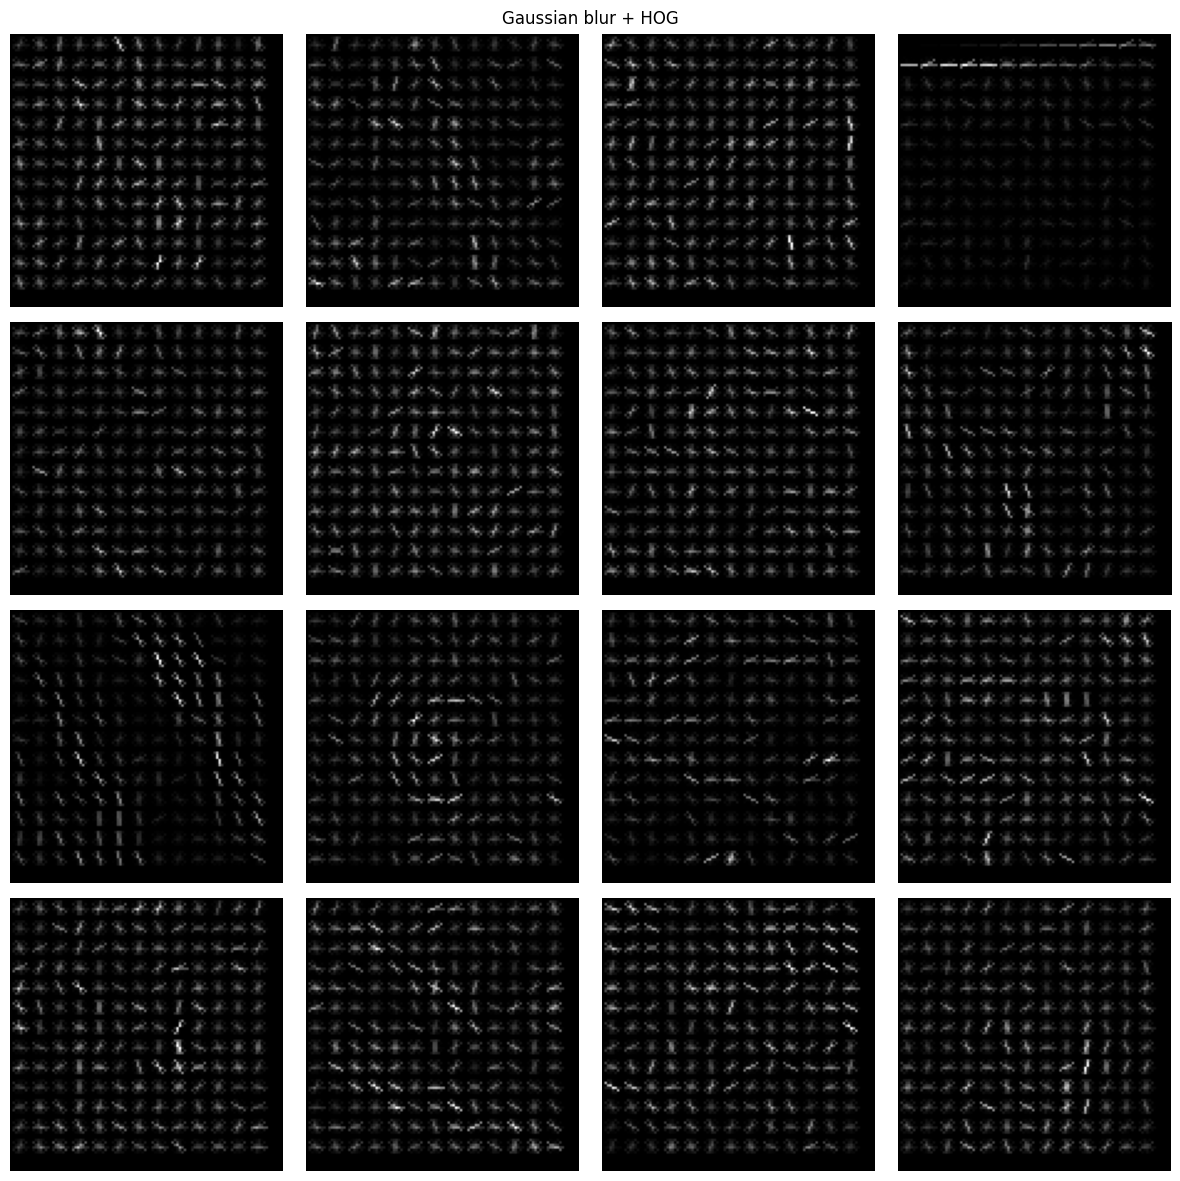

In [7]:
num_images = 16
sample_images = hog_images[:num_images]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()  

for i in range(num_images):
    axes[i].imshow(sample_images[i], cmap='gray')
    axes[i].axis('off')

fig.suptitle(f'Gaussian blur + HOG')
plt.tight_layout()
plt.show()

In [8]:
hog_images

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00049092, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00089081, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00084288, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00181743, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        

In [12]:
np.shape(hog_images)

(7000, 110, 110)

In [14]:
type(hog_images)

list

In [16]:
hog_images_np = np.array(hog_images)  # Convertendo a lista para um array NumPy
hog_images_reshaped = hog_images_np.reshape(7000, 110*110)

np.shape(hog_images_reshaped)

(7000, 12100)

In [17]:
df_hog = pd.DataFrame(hog_images_reshaped)

df_hog.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_hog.to_csv('../data/preprocessed/gaussian_blur_train.csv', header=None,index=False)